#Importar librerias y conectar con Drive

In [ ]:
import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
sns.set_theme()
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from joblib import dump
from joblib import load

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

from google.colab import drive
import cv2
from PIL import Image
import numpy as np

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

from IPython.display import Image

import cv2
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


2.12.0


##Conectar con drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from google.colab import drive

path = "/content/drive/My Drive/Proyecto IA"
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Proyecto IA


#Cargar los modelos

##DeepLearning

In [ ]:
imagenes, etiquetas= load('/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset1.pkl')

# Cargar el modelo desde el archivo
modeldeep = load('/content/drive/MyDrive/Proyecto IA/Modelos/modeldeep.pkl')
datos, datosV, etiquetas, etiquetasV = train_test_split(imagenes, etiquetas, test_size=0.1, random_state=42)
# Codificar las etiquetas a valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(etiquetas)
y_test_encoded = label_encoder.transform(etiquetasV)
X_train, X_test, y_train, y_test = train_test_split(datos.reshape(len(datos), -1), etiquetas, test_size=0.3, random_state=22)


##Gaussian Naive Bayes



In [ ]:
# Cargar el modelo desde el archivo
modelo1 = load('/content/drive/MyDrive/Proyecto IA/Modelos/modelo1_1.pkl')

## Decision Tree

In [ ]:
# Cargar el modelo desde el archivo
modelo2 = load('/content/drive/MyDrive/Proyecto IA/Modelos/modelo2_2.pkl')

##Modelo 3: Random Forest

In [ ]:
# Cargar el modelo desde el archivo
modelo3 = load('/content/drive/MyDrive/Proyecto IA/Modelos/modelo3_3.pkl')

##Aprendizaje no supervisado

In [ ]:
agglomerative_labels=load('/content/drive/MyDrive/Proyecto IA/Modelos/agglomerative_labels.pkl')
kmeans_labels=load('/content/drive/MyDrive/Proyecto IA/Modelos/kmeans_labels.pkl')

##Ejecutar funciones

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
def ejemplosCargados(ruta_imagen):
  # Cargar la imagen en escala de grises
  imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

  # Cambiar el tamaño de la imagen a 48x48
  imagen = cv2.resize(imagen, (48, 48))
  # Mostrar la imagen
  plt.imshow(imagen, cmap='gray')
  plt.axis('off')
  plt.show()


  # Mostrar la imagen procesada
  Image.fromarray(imagen)

  # Preprocesar la imagen para usarla en el modelo
  imagen = imagen.reshape(1, 48, 48, 1)
  imagen = imagen.astype('float32') / 255

  # Realizar la predicción en la imagen
  prediccion = modeldeep.predict(imagen)
  etiqueta_predicha = label_encoder.inverse_transform([np.argmax(prediccion)])


  # Imprimir la etiqueta predicha
  print("Etiqueta predicha:", etiqueta_predicha)

  return

#Probar los modelos

##Ejemplos cargados

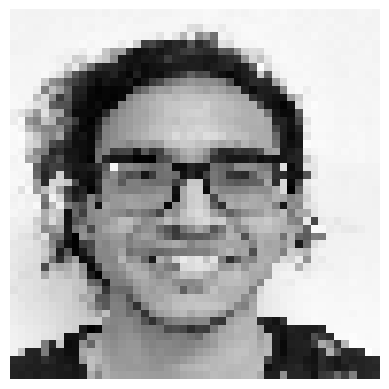

1/1 [==============================] - 0s 15ms/step
Etiqueta predicha: ['happy']


In [ ]:
ejemplosCargados('/content/drive/MyDrive/Proyecto IA/Prueba/IMG_20230718_131542.jpg')

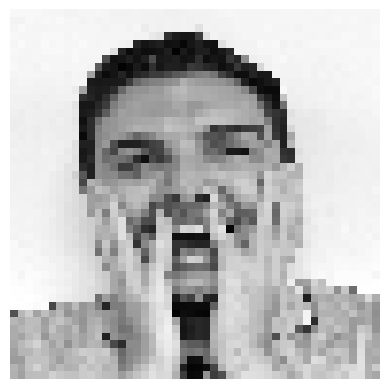

1/1 [==============================] - 0s 25ms/step
Etiqueta predicha: ['fearful']


In [ ]:
ejemplosCargados('/content/drive/MyDrive/Proyecto IA/Prueba/IMG_20230718_131603.jpg')

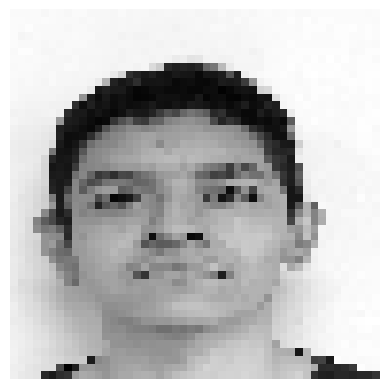

1/1 [==============================] - 0s 17ms/step
Etiqueta predicha: ['sad']


In [ ]:
ejemplosCargados('/content/drive/MyDrive/Proyecto IA/Prueba/IMG_20230718_131624.jpg')

##Prueba tu mismo (DeepLearning)

Para mejores resultados, recomendamos que se tome la foto con un fondo blanco y buena ilimunación

<IPython.core.display.Javascript object>

Saved to photo.jpg


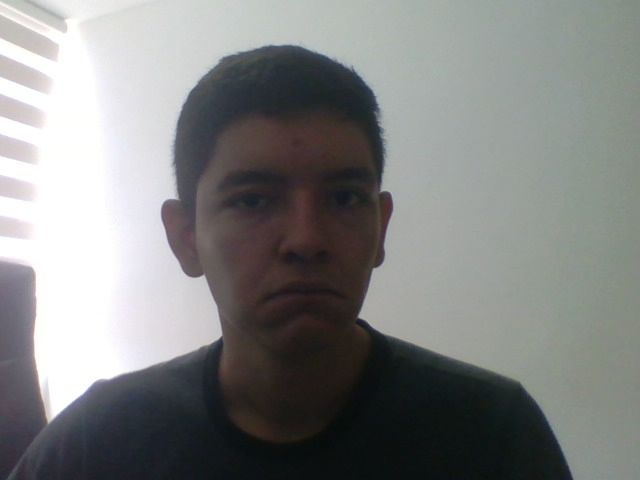

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

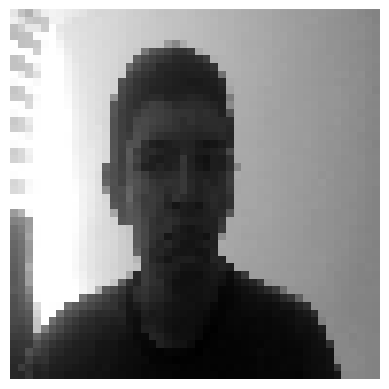

1/1 [==============================] - 0s 22ms/step
Etiqueta predicha: ['fearful']


In [ ]:
import cv2
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder



captured_image = cv2.imread('photo.jpg')
gray_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2GRAY)

imagen = cv2.cvtColor(captured_image, cv2.COLOR_BGR2GRAY)
imagen = cv2.resize(imagen, (48, 48))
plt.imshow(imagen, cmap='gray')
plt.axis('off')
plt.show()
Image.fromarray(imagen)

# Preprocesar la imagen para usarla en el modelo
imagen = imagen.reshape(1, 48, 48, 1)
imagen = imagen.astype('float32') / 255

# Realizar la predicción en la imagen
prediccion = modeldeep.predict(imagen)
etiqueta_predicha = label_encoder.inverse_transform([np.argmax(prediccion)])

# Imprimir la etiqueta predicha
print("Etiqueta predicha:", etiqueta_predicha)

##Resultados de los modelos de MachineLearning

###Modelo 1: Gaussian Naive Bayes


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparar los datos de entrenamiento y prueba


# Crear y entrenar el modelo Gaussian Naive Bayes
modelo1 = GaussianNB()
modelo1.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo1.predict(X_test)

# Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo1:", exactitud)
print(classification_report(y_test, y_pred))

Exactitud del modelo1: 0.21923356527157545
              precision    recall  f1-score   support

       angry       0.21      0.04      0.07      1355
   disgusted       0.02      0.21      0.04       136
     fearful       0.24      0.06      0.09      1366
       happy       0.38      0.15      0.22      2335
     neutral       0.27      0.16      0.21      1685
         sad       0.26      0.40      0.31      1668
   surprised       0.21      0.59      0.31      1084

    accuracy                           0.22      9629
   macro avg       0.23      0.23      0.18      9629
weighted avg       0.27      0.22      0.20      9629



Exactitud en los datos de validación: 0.1519910263600673


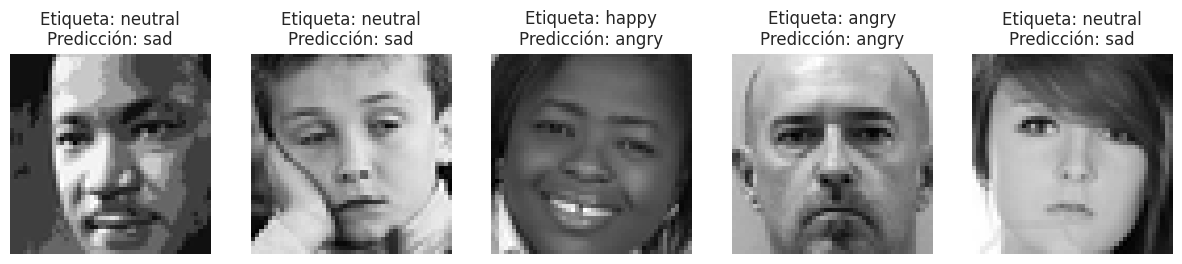

In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo1.predict(X_val)

# Calcular la exactitud en los datos de validación
accuracy_val = accuracy_score(etiquetasV, y_pred_val)
print("Exactitud en los datos de validación:", accuracy_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)


###Modelo 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


modelo2 = DecisionTreeClassifier(max_depth=8)##que tan grande haga los arboles

modelo2.fit(X_train,y_train)

# Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo1:", exactitud)
print(classification_report(y_test, y_pred))

Exactitud del modelo1: 0.21923356527157545
              precision    recall  f1-score   support

       angry       0.21      0.04      0.07      1355
   disgusted       0.02      0.21      0.04       136
     fearful       0.24      0.06      0.09      1366
       happy       0.38      0.15      0.22      2335
     neutral       0.27      0.16      0.21      1685
         sad       0.26      0.40      0.31      1668
   surprised       0.21      0.59      0.31      1084

    accuracy                           0.22      9629
   macro avg       0.23      0.23      0.18      9629
weighted avg       0.27      0.22      0.20      9629



Precisión en los datos de validación: 0.30846887268648343


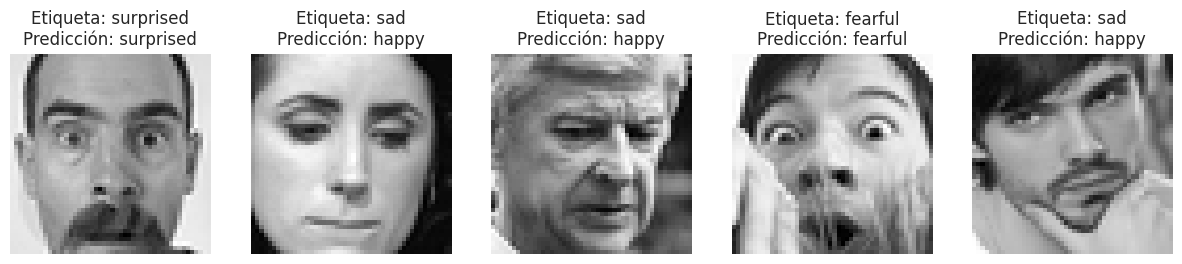

In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo2.predict(X_val)

# Calcular la exactitud en los datos de validación
accuracy_val = accuracy_score(etiquetasV, y_pred_val)
print("Exactitud en los datos de validación:", accuracy_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)

Exactitud en los datos de validación: 0.4461581604038138


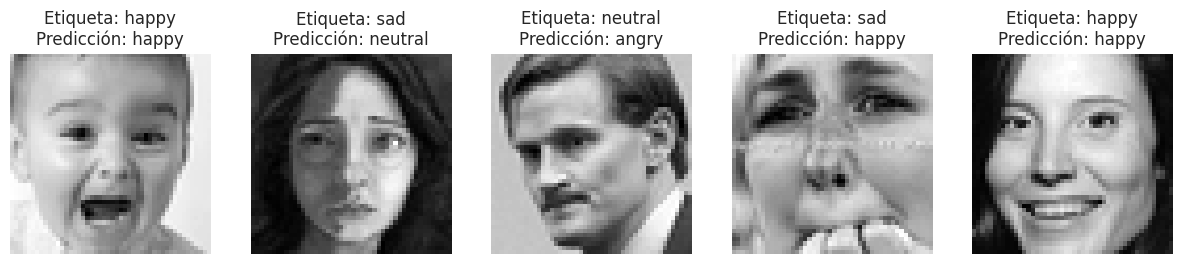

In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo3.predict(X_val)

# Calcular la exactitud en los datos de validación
accuracy_val = accuracy_score(etiquetasV, y_pred_val)
print("Exactitud en los datos de validación:", accuracy_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)

###Modelo 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de Random Forest
modelo3 = RandomForestClassifier(n_estimators=100, random_state=42)
modelo3.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo3.predict(X_test)

# Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo1:", exactitud)
print(classification_report(y_test, y_pred))


Exactitud del modelo1: 0.44635995430470454
              precision    recall  f1-score   support

       angry       0.47      0.20      0.28      1355
   disgusted       1.00      0.32      0.48       136
     fearful       0.46      0.25      0.33      1366
       happy       0.43      0.78      0.55      2335
     neutral       0.41      0.38      0.39      1685
         sad       0.37      0.33      0.35      1668
   surprised       0.67      0.58      0.62      1084

    accuracy                           0.45      9629
   macro avg       0.54      0.41      0.43      9629
weighted avg       0.46      0.45      0.43      9629



In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo3.predict(X_val)

# Calcular la precisión en los datos de validación
precision_val = accuracy_score(etiquetasV, y_pred_val)
print("Precisión en los datos de validación:", precision_val)



num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)

##Resultados de Aprendizaje no supervizado

In [ ]:
# Definir colores para las clases
class_colors = {
    'angry': 'red',
    'disgusted': 'blue',
    'fearful': 'green',
    'happy': 'orange',
    'neutral': 'purple',
    'sad': 'brown',
    'surprised': 'pink',
}

# Visualizar los resultados con etiquetas verdaderas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[class_colors[label] for label in y], label='Etiquetas verdaderas')
plt.title("Etiquetas verdaderas")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Visualizar los resultados del agrupamiento de Agglomerative Clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_labels, cmap='viridis', label='Agglomerative Clustering')
plt.title("Agglomerative Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Visualizar los resultados del agrupamiento de K-means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', label='K-means')
plt.title("K-means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()